In [187]:
#todo - remove unused imports and clean up code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
import sklearn

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import plot_confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from statistics import mean
import pickle
from sklearn.metrics import auc, precision_recall_curve

In [2]:
malwareData = pd.read_csv("C:\\Users\\warri\\OneDrive\\MSC UNI WORK\\dataset disso\\dataset_malwares.csv")

In [3]:
malwareData.columns

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

In [4]:
malwareData.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [5]:
len(malwareData)

19611

In [6]:
#imbalanced data 

K:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Benign'), Text(1, 0, 'Malware')]

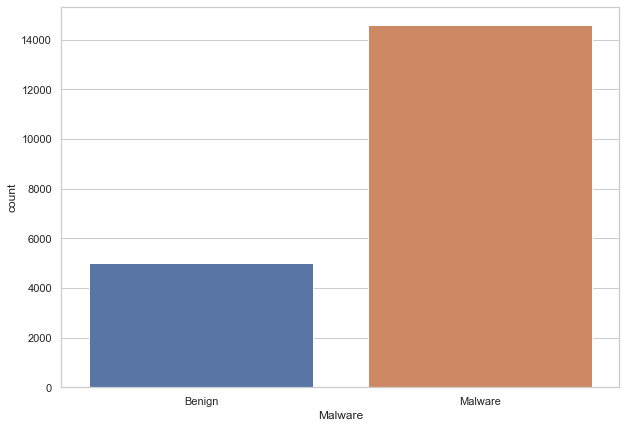

In [115]:
plt.figure(figsize=(10, 7))
ax=sns.countplot(malwareData['Malware'])
sns.set_theme(style="whitegrid")
ax.set_xticklabels(['Benign', 'Malware'])

In [121]:
malwareData.Malware.value_counts()

1    14599
0     5012
Name: Malware, dtype: int64

In [8]:
used_malwareData = malwareData.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

malware = malwareData['Malware']

In [9]:
print(used_malwareData)

       e_magic  e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  \
0        23117     144     3       0          4           0       65535     0   
1        23117     144     3       0          4           0       65535     0   
2        23117     144     3       0          4           0       65535     0   
3        23117     144     3       0          4           0       65535     0   
4        23117     144     3       0          4           0       65535     0   
...        ...     ...   ...     ...        ...         ...         ...   ...   
19606    23117     144     3       0          4           0       65535     0   
19607    23117     144     3       0          4           0       65535     0   
19608    23117       0     0       0          0           0           0     0   
19609    23117     144     3       0          4           0       65535     0   
19610    23117     144     3       0          4           0       65535     0   

       e_sp  e_csum  ...  S

In [10]:
print(malwareData.head(10))

                                          Name  e_magic  e_cblp  e_cp  e_crlc  \
0  VirusShare_a878ba26000edaac5c98eff4432723b3    23117     144     3       0   
1  VirusShare_ef9130570fddc174b312b2047f5f4cf0    23117     144     3       0   
2  VirusShare_ef84cdeba22be72a69b198213dada81a    23117     144     3       0   
3  VirusShare_6bf3608e60ebc16cbcff6ed5467d469e    23117     144     3       0   
4  VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb    23117     144     3       0   
5  VirusShare_eff7676f69be2b519f3424def92d3590    23117      80     2       0   
6  VirusShare_e76cac211258723745f66bd9f9e29590    23117     144     3       0   
7  VirusShare_cef6cdf0e85303a461f67f19ffcc2ddf    23117      80     2       0   
8  VirusShare_59af5dfb0c79537eedd3326abde3c857    23117     144     3       0   
9  VirusShare_fda0add9d9a8c18c67a758ec2898d976    23117     144     3       0   

   e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  ...  SectionMaxChar  \
0          4           0       6553

In [11]:
print(malwareData.columns)

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

In [12]:
# remove these features
# Name,machine,timeDateStamp would be unqiue 

In [13]:
Data = malwareData.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware','SuspiciousImportFunctions'], axis=1)


In [14]:
Target = malwareData['Malware'].values

# Standard Random Forest Classifier

In [122]:
#Build SRF model
SRF = RandomForestClassifier(n_estimators=150, random_state=0)

In [123]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')

In [140]:
#Evaluate SRF model
scoresSRF = cross_validate(SRF, Data, Target, scoring=scoring, cv=cv)

In [125]:
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scoresSRF['test_f1']))
print('Mean recall: %.3f' % mean(scoresSRF['test_recall']))
print('Mean precision: %.3f' % mean(scoresSRF['test_precision']))

Mean f1: 0.993
Mean recall: 0.997
Mean precision: 0.989


In [167]:
#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.3, stratify=Target)

In [168]:
#Train SRF
SRF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=0)

In [169]:
#SRF prediction result
y_pred = SRF.predict(X_test)

K:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


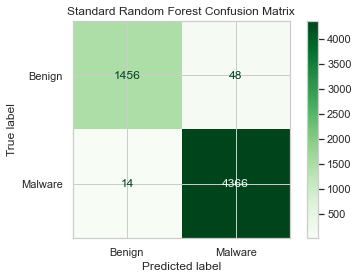

In [170]:
#Create confusion matrix
fig = plot_confusion_matrix(SRF, X_test, y_test, display_labels=['Benign', 'Malware'], cmap='Greens')
plt.title('Standard Random Forest Confusion Matrix')
plt.show()

# Balanced Random Forest Classifier

In [190]:
#Build SRF model
BRFC = BalancedRandomForestClassifier(n_estimators=150, random_state=2)


In [191]:
#Create Stratified K-fold cross validation
#minimize outcome’s variance due to algorithm’s random probability distribution nature.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')


In [192]:
#Evaluate BRFC model
scores = cross_validate(BRFC, Data, Target, scoring=scoring, cv=cv)


In [193]:
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Mean f1: 0.991
Mean recall: 0.990
Mean precision: 0.992


In [163]:
#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.3, stratify=Target)

In [135]:
print(f'Number of features is {X_train.shape[1]}')


Number of features is 74


In [164]:
#Train BRFC
BRFC.fit(X_train, y_train)

BalancedRandomForestClassifier(n_estimators=150, random_state=2)

In [165]:
#BRFC prediction result
y_pred = BRFC.predict(X_test)

K:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


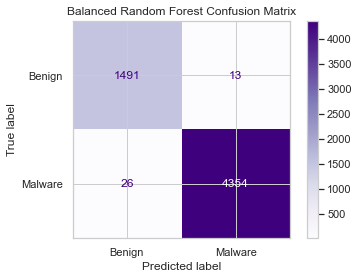

In [184]:
fig = plot_confusion_matrix(BRFC, X_test, y_test, display_labels=['Benign', 'Malware'], cmap='Greens')
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()

# SMOTE (Synthetic Minority Oversampling Technique)

In [157]:
#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(Data, Target)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.3, stratify=over_y)

In [158]:
print(f'Number of features is {X_train.shape[1]}')

Number of features is 74


In [159]:
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)

In [160]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')

In [161]:
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)

In [186]:
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Mean f1: 0.992
Mean recall: 0.995
Mean precision: 0.989


In [153]:
#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.3, stratify=Target)

In [176]:
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)

RandomForestClassifier(n_estimators=150, random_state=0)

In [177]:
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)

K:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


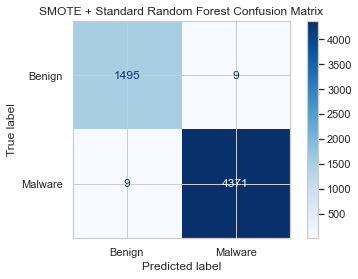

In [183]:
#Creat confusion matrix
fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['Benign', 'Malware'], cmap='Blues')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

In [69]:
featurelist = pd.DataFrame(SMOTE_SRF.feature_importances_, index=Data.columns).sort_values(by=0, ascending=False)

In [95]:
featurelist

,0
MajorLinkerVersion,0.097444
ImageBase,0.091520
SizeOfStackReserve,0.083523
Characteristics,0.066931
MinorOperatingSystemVersion,0.066160
...,...
SectionMinVirtual,0.000000
SectionMinPhysical,0.000000
SectionMaxVirtualsize,0.000000
SectionMaxRawsize,0.000000


In [71]:
joblib.dump(SMOTE_SRF,'classifier3.pkl')

['classifier3.pkl']

In [36]:
open('featureslist.pkl', 'wb').write(pickle.dumps(featurelist))

2642

In [37]:
FeatureSelection = SMOTE_SRF.fit(over_X_train, over_y_train)


RandomForestClassifier(n_estimators=150, random_state=0)

In [38]:
Model = SelectFromModel(FeatureSelection, prefit=True)


In [73]:
Data_new = Model.transform(Data)
print (Data.shape)
print (Data_new.shape)


(19611, 74)
(19611, 21)


K:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [113]:
features123 = Data.columns

In [74]:
Features = Data_new.shape[1]

In [75]:
features = [] # actual features used 

In [76]:
SMOTE1 = SMOTE_SRF.fit(over_X_train, over_y_train)
Index = np.argsort(SMOTE1.feature_importances_)[::-1][:Features]
for feat in range(Features):
    print(Data.columns[2+Index[feat]], FeatureSelection.feature_importances_[Index[feat]])
    features.append(Data.columns[2+Index[feat]])

SizeOfCode 0.08676539850231232
FileAlignment 0.08693717107235231
SizeOfHeapReserve 0.07219449580401502
MajorLinkerVersion 0.06912827141315858
MinorImageVersion 0.07200001489985287
SizeOfHeaders 0.058459903429109034
SizeOfStackCommit 0.040311217446829646
MajorImageVersion 0.04850640065894285
MinorSubsystemVersion 0.036144748765046954
SizeOfStackReserve 0.03086836160289652
CheckSum 0.02912865669320339
SectionMinRawsize 0.02505733714509611
DirectoryEntryImport 0.023538511943890054
ImageDirectoryEntryResource 0.02518290494007596
ImageDirectoryEntryImport 0.019558007089733834
ImageDirectoryEntryExport 0.01972155803770237
AddressOfEntryPoint 0.019959347037113755
Subsystem 0.02012461923693922
PointerToSymbolTable 0.01541367241531402
MajorSubsystemVersion 0.015356640884394797


IndexError: index 75 is out of bounds for axis 0 with size 74

In [77]:
features

['SizeOfCode',
 'FileAlignment',
 'SizeOfHeapReserve',
 'MajorLinkerVersion',
 'MinorImageVersion',
 'SizeOfHeaders',
 'SizeOfStackCommit',
 'MajorImageVersion',
 'MinorSubsystemVersion',
 'SizeOfStackReserve',
 'CheckSum',
 'SectionMinRawsize',
 'DirectoryEntryImport',
 'ImageDirectoryEntryResource',
 'ImageDirectoryEntryImport',
 'ImageDirectoryEntryExport',
 'AddressOfEntryPoint',
 'Subsystem',
 'PointerToSymbolTable',
 'MajorSubsystemVersion']

In [114]:
open('featureslist.pkl', 'wb').write(pickle.dumps(features123))

1576

In [45]:
joblib.dump(Model,'classifier4.pkl')

['classifier4.pkl']

In [ ]:
#testing - remove later

In [46]:
print(features)

['BaseOfCode', 'Magic', 'DllCharacteristics', 'MajorOperatingSystemVersion', 'SizeOfOptionalHeader', 'MinorImageVersion', 'FileAlignment', 'Subsystem', 'MajorImageVersion', 'SizeOfImage', 'MajorSubsystemVersion', 'DirectoryEntryImport', 'SuspiciousImportFunctions', 'SectionMinVirtual', 'SizeOfHeaders', 'SizeOfCode', 'SectionMaxChar', 'SectionMainChar', 'Machine', 'MinorOperatingSystemVersion', 'ImageDirectoryEntryImport']


In [47]:
benign_Train, benign_Test, Malware_Train, Malware_Test = model_selection.train_test_split(Data_new, Target ,test_size=0.3)


In [48]:

clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 3)
clf.fit(benign_Train, Malware_Train)
score = clf.score(benign_Test, Malware_Test)
print(score)

0.9726376614547927


In [49]:

clfb = sklearn.ensemble.RandomForestClassifier(n_estimators=100, class_weight='balanced')
clfb.fit(benign_Train, Malware_Train)
score = clf.score(benign_Test, Malware_Test)
print(score)

0.9726376614547927


In [50]:

clfbs = sklearn.ensemble.RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
clfbs.fit(benign_Train, Malware_Train)
score = clf.score(benign_Test, Malware_Test)
print(score)

0.9726376614547927


In [51]:
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, 
                                              random_state=1,
                                              min_samples_split = 10,
                                              max_features = "sqrt",
                                              oob_score = True,
                                              max_depth = 5)
clf.fit(benign_Train, Malware_Train)
score = clf.score(benign_Test, Malware_Test)
print(score)
print(clf.oob_score_)

0.9760367097212781
0.9777810155168646


In [52]:
Features

21

In [53]:
joblib.dump(clfbs,'classifier3.pkl')

['classifier3.pkl']

In [54]:
joblib.dump(clfb,'classifier2.pkl')

['classifier2.pkl']

In [55]:
open('features.pkl', 'wb').write(pickle.dumps(features))

420